Import Libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load uploaded dataset
df = pd.read_csv('/content/sample_data/Fake.csv')
df.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


 Preprocessing

In [4]:
# Add a label column: 1 for Fake
df['label'] = 1

# Drop unnecessary columns
df = df[['text', 'label']]  # Keep only the text and label

# Check for missing values
df.dropna(inplace=True)

df.head()


<ipython-input-4-3845338045>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


TF-IDF Vectorization + Train-Test Split

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)


Load & Label Both Files

In [8]:
# Load both fake and real news
df_fake = pd.read_csv('/content/sample_data/Fake.csv')
df_fake['label'] = 1

df_real = pd.read_csv('/content/sample_data/True.csv')
df_real['label'] = 0

# Combine both datasets
df_combined = pd.concat([df_fake[['text', 'label']], df_real[['text', 'label']]], ignore_index=True)

# Drop missing values
df_combined.dropna(inplace=True)

# Preview
df_combined['label'].value_counts()


,count
label,
1,23481
0,21417


Train Logistic Regression Model

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split features and labels
X = df_combined['text']
y = df_combined['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Train Logistic Regression & Evaluate

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {round(acc * 100, 2)}%")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy: 98.63%

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


🧮 Confusion Matrix:
[[4231   53]
 [  70 4626]]


Plot Confusion Matrix

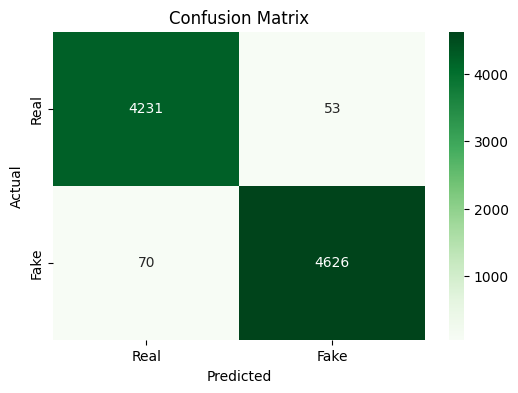

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


TESTING

In [13]:
def predict_news(text):
    # Transform input using the same TF-IDF vectorizer
    text_vector = vectorizer.transform([text])

    # Predict using the trained model
    prediction = model.predict(text_vector)

    # Map prediction to label
    result = 'Fake News' if prediction[0] == 1 else 'Real News'
    return result


In [14]:
# Test with a sample article
sample = "Breaking: President announces new tax reform bill for 2025."
print("Prediction:", predict_news(sample))


Prediction: Fake News


In [17]:
sample_real = """
"Finance Minister announces increase in capital expenditure in the Union Budget to boost infrastructure and job creation."

"""

print("Prediction:", predict_news(sample_real))


Prediction: Real News
